# 21M.387 Fundamentals of Music Processing
## Lab1 - Solutions

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
from ipywidgets import interact

import sys
sys.path.append("../common")
from util import *

# choose one of these: inline or notebook.
# renders the plot as an image which you can see.
%matplotlib inline

# creates an "interactive plot" which some navigation controls.
# %matplotlib notebook   

## Exercise 1

1. Find a song. There must must be a song somewhere on your computer.
- Open that song in [Audacity](http://www.audacityteam.org/download/).
- Find 10 seconds that you think are interesting.
- Change the _Project Rate (Hz)_ to 22050 (lower left corner).
- Export that bit of audio using _File_ -> _Export Selected Audio_.
- Choose the format _WAV (Microsoft) signed 16-bit PCM_.
- Load that audio and play it in the code cell below by using:  
`ipd.Audio('your file name.wav')`

In [4]:
ipd.Audio('audio/beeth5_orch_21bars.wav')

Now, load that same audio into python by calling:  
`x = load_wav('your file name.wav')`

Try using TAB completion. It works for both function and filenames.

The sample rate is 22050. In fact, `load_wav()` is a special function I wrote that will fail if the underlying wave file is NOT 22050. It will also convert stereo to mono. Type:
`load_wav?` and execute the cell to see help about that function.

- Inspect the length of `x` with `len(x)`
- Play the vector `x` with `ipd.Audio(x, rate=22050)`
- Change the `rate` to some other number for fun. 

In [5]:
x = load_wav('audio/beeth5_orch_21bars.wav', 0, 7)
ipd.Audio(x, rate=22050)

## Exercise 2

Plot the audio that you just loaded. You use matplotlib's `pyplot`, which we imported into the namespace `plt`. There are about a billion plotting options in matplotlib. [Here](http://matplotlib.org/users/pyplot_tutorial.html) is a pyplot tutorial (for future reference).

The basic plot is easy:  
`plt.figure()` will set up a new figure.  
`plt.plot(x)`  will plot to the most recent figure.

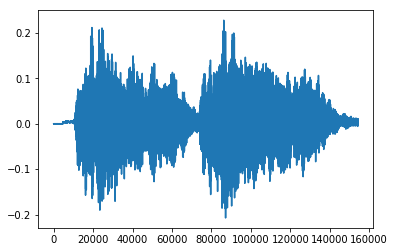

In [7]:
plt.figure()
plt.plot(x)
plt.show();

Let's label the time axis better. For each point on the x-axis, we want to supply the correct time value.

- We have $x(n)$. We want to create $t(n)$ which provides the correct time value at index $n$.
- Create the vector `t`
- It should be the same length as `x`.
- Use the functions `np.arange()`. You can see some examples below. 
- In numpy, all mathematical operations work on arrays (vectors) as well as scalars.

Once you have created the correct vector `t`, you can plot:  
`plt.figure()
plt.plot(t, x)`

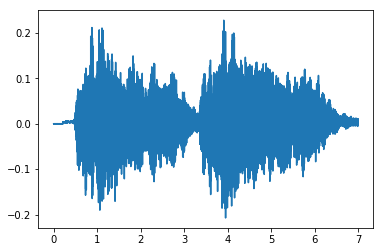

In [6]:
fs = 22050.
t = np.arange(len(x)) / fs
plt.figure()
plt.plot(t, x)
plt.show();

## Exercise 3

Now, we will modify the audio signal x.

- Create a new vector $g(n)$ that is a linear ramp going from 0.0 to (almost) 1.0.
- Plot `g`
- Then, do a vector point-by-point multiply in numpy: `x * g` to make a new vector `y`.
- Plot `y`
- Listen to it.


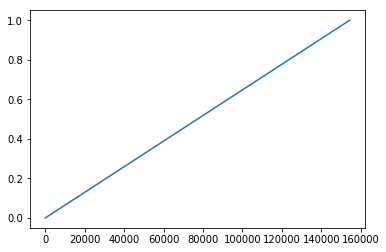

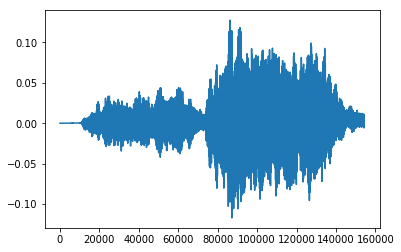

In [8]:
g = np.arange(len(x),dtype=np.float) / len(x)
plt.plot(g)
y = x * g
plt.figure()
plt.plot(y)
ipd.Audio(y, rate=fs)

## Exercise 4

As you know, loudness scales as the _log_ of amplitude, so we often measure volume in decibels (dB). The reference amplitude in this case is 1.0 (max volume). As we scale down the amplitude, the volume (in dB) goes negative.

Remember that the relationship between amplitude and the dB scale is:
$$ v_{dB} = 20 \cdot \log_{10}(a) $$

For example:

| dB    | Amp   |
|-------|-------|
| 0     | 1.0   |
| -6.02 | 0.5   |
| -40   |  0.01 |


- Make a new vector `g` that modifies the volume of `x` in a _linearly perceived_ way, starting at $v_{dB} = -40$ and ending at $v_{dB} = 0$.
- As above, plot `g` and `g * x`, and listen to the result.
- Instead of using np.arange(), try using np.linspace(). See some usage examples below.
- Oh. Also, to do exponents in numpy, use `**`

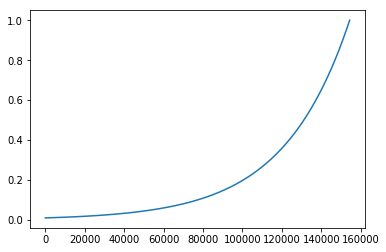

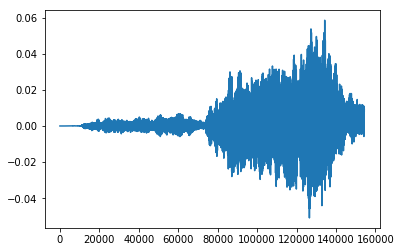

In [9]:
# print np.linspace(2, 4, 10)
# print np.linspace(-5, 5, 20, endpoint=False)
# print np.linspace(0,4,5) ** 2

db = np.linspace(-40, 0, len(x))
g = 10 ** (db/20)
y = g * x
plt.figure()
plt.plot(g)
plt.figure()
plt.plot(y)
ipd.Audio(y, rate=fs)


## Exercise 5

For this problem, it is useful to concatenate two vectors together. See below.

Make a volume ramp up to the half-way point and then ramp back down.
The volume curve should be (if song length is $L$):
- for $n=[0, {L\over2}) \rightarrow v=[-40db,0db)$
- for $n=[{L\over2},L) \rightarrow v=[0db,-40db)$

Plot and listen.

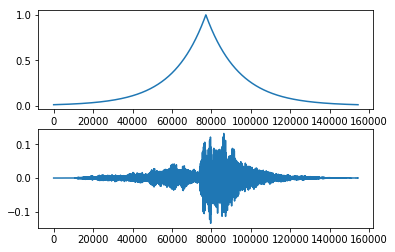

In [10]:
# a = np.arange(4)
# b = np.ones(3)
# c = np.concatenate((a,b))
# print a
# print b
# print c

L = len(x)
L1 = L/2
L2 = L - L/2
db1 = np.linspace(-40, 0, L1, endpoint=False)
db2 = np.linspace(0, -40, L2, endpoint=False)
db = np.concatenate((db1, db2))
g = 10 ** (db / 20)
y = g * x

plt.subplot(2,1,1)
plt.plot(g)
plt.subplot(2,1,2)
plt.plot(y)
ipd.Audio(y, rate=fs)

## Exercise 6

Now instead of using $x(n)$ from a file, synthesize your own $x(n)$ to be a sine wave at a particular frequency in Hertz using the following function:

$$x(n) = sin(2 \pi f n / F_s) $$

where $f$ is the desired frequency in Hertz and $F_s$ is the sampling rate of your generated audio.

Once you have the basic sine wave, you can play around with some more ideas:
- add a number of sine waves together of different frequencies.
- apply a volume curve like you did above.
- stitch together a number of sine waves in a row to generate a melody.


In [11]:
fs = 22050.0

# simple envelope generator.
def env(db1, db2, L):
    db = np.linspace(db1, db2, L)
    return 10 ** (db/20)


# freq in Hz. dur in seconds
def make_sine(freq, dur):
    N = int(dur * fs)
    n = np.arange(N)
    x = np.sin(2 * np.pi * freq * n / fs)
    e = env(0, -40, N)
    return x * e

def many_sines(freqs, dur):
    N = int(dur * fs)    
    x = np.zeros(N)
    for f in freqs:
        x += make_sine(f, dur)
    return x

def p_to_f(p) :
    return 440. * 2 ** (p/12.)
    
def make_melody(notes) :
    x = np.zeros(0)
    for p, d in notes:
        f = p_to_f(p)
        x = np.concatenate((x, make_sine(f, d)))
    return x



In [12]:
x = make_sine(440, 3)
ipd.Audio(x, rate=fs)

In [13]:
x = many_sines([220, 330, 440, 550, 660], 3)
ipd.Audio(x, rate=fs)

In [14]:
mel = ( [7, 1], [0, .5], [2, .5], [4, .5], [5, .5], [7, 1], [0, 1], [0, 1],)

x = make_melody(mel)
ipd.Audio(x, rate=fs)